# Telecom customer churn prediction model
Our business problem is that Telecom industry faces a lot of customer churn problem, which proportionally effects the company revenue stream, A customer might leave a service due to various factors which might influence him to leave, in other instances some features ultimately result the customer to stay with the current provider.

Our aim is to build a model that trains on the information of thousands of customers and the features which will be able to predict in future whether that person might leave or decide to stay with the company. This will help the companies, as when they test it with real world data with similar features, our model will be able to predict & produce results relevant to whether the customer churns or not.

### The data set includes information about:

Customers who left – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
This analysis focuses on the behavior of telecom customers who are more likely to leave the platform. I intend to find out the most striking behavior of customers through EDA and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

# Data modeling
Further diving into this notebook, we are going to build prediction models and analyse the information that we achieved 

# Goal: 
The Telco Customer Churn dataset is a classification problem, where the goal is to predict whether a customer will churn (i.e., cancel their subscription) or not. Therefore, evaluation metrics for classification models should be used to assess the performance of the model.
Our models, will be trained with the train data which we earlier had split, then they will be tested with the test data and we aim to find out the best suitable model for our business problem.
By finding out the best model, in order to do predictions in future we can use that data to test with our best selected model so that it will be providing the best suitable output predicting the customer churn or not.

Some commonly used evaluation metrics for classification models include:

*Accuracy*: This metric measures the overall correctness of the model's predictions. It calculates the proportion of correct predictions out of all predictions made by the model. While accuracy is a popular metric, it can be misleading in imbalanced datasets, where the number of instances in one class greatly outnumbers the other.

*Precision*: This metric measures the proportion of true positive predictions out of all positive predictions made by the model. It is a good metric to use when the cost of false positives is high.

*Recall (Sensitivity)*: This metric measures the proportion of true positive predictions out of all actual positive instances in the dataset. It is a good metric to use when the cost of false negatives is high.

*F1 score*: This metric is a weighted average of precision and recall, which gives equal importance to both metrics. It is a good metric to use when you want to balance precision and recall.

### Evaluation metric 
For the Telco Customer Churn dataset on Kaggle, since the goal is to predict whether a customer will churn or not, a binary classification problem, the appropriate evaluation metric is the classification accuracy.

Classification accuracy measures the proportion of correct predictions made by the model out of all predictions made on the dataset. In the context of customer churn prediction, accuracy measures the proportion of customers for whom the model correctly predicts their churn or retention status.

In [1]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
# set random seed to ensure that results are repeatable
np.random.seed(1)

**In this notebook we will be cleaning and prep the data ready for model fitting**

In [2]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
from sklearn.neural_network import MLPClassifier


In [4]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#reading the dataset

In [5]:
df.head()
#displays the top few rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Null Values
From the above analysis we have found out that there are missing values in the total charges column, so in order to proceed further with our analysis we will later impute the missing values with the mean or median of the column.

In [7]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

### Our Target variable churn has two 2 unique values, yes for determining that the user has churned and No for determining that the user has not churned the network

In [8]:
#df.PaymentMethod.unique()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.drop(['customerID'], axis=1, inplace = True)

**We dropped the customer ID column as that particular column has no significance in determining our expected results, hence we drop the column as it has no influence on our results**

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#The totalcharges column has been converted into an float datatype as the values are continous float data

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# create a list of these catagorical variables
category_var_list = list(df.select_dtypes(include='object').columns)
category_var_list

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

##### We get our list of categorical values, these column need to be encoded later for our modeling purposes as our models need to train and do predictions on the data

In [14]:
# explore the categorical variable values - often there are typos here that need to be fixed.
for cat in category_var_list: # generally, we want to avoid for loops and use a functional style (i.e. list comprehension)
    print(f"Category: {cat} Values: {df[cat].unique()}")

Category: gender Values: ['Female' 'Male']
Category: Partner Values: ['Yes' 'No']
Category: Dependents Values: ['No' 'Yes']
Category: PhoneService Values: ['No' 'Yes']
Category: MultipleLines Values: ['No phone service' 'No' 'Yes']
Category: InternetService Values: ['DSL' 'Fiber optic' 'No']
Category: OnlineSecurity Values: ['No' 'Yes' 'No internet service']
Category: OnlineBackup Values: ['Yes' 'No' 'No internet service']
Category: DeviceProtection Values: ['No' 'Yes' 'No internet service']
Category: TechSupport Values: ['No' 'Yes' 'No internet service']
Category: StreamingTV Values: ['No' 'Yes' 'No internet service']
Category: StreamingMovies Values: ['No' 'Yes' 'No internet service']
Category: Contract Values: ['Month-to-month' 'One year' 'Two year']
Category: PaperlessBilling Values: ['Yes' 'No']
Category: PaymentMethod Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Category: Churn Values: ['No' 'Yes']


In [15]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Encode our categorical variables

Categorical variables usually have strings for their values. Many machine learning algorithms do not support string values for the input variables. Therefore, we need to replace these string values with numbers. This process is called categorical variable encoding.

In a previous step we identified few catagorical variables and found no indication of typos in the class names. Our focus is now on encoding the variables. 

We have used *Dummy Encoding* to encoding variables



In [16]:
#the dummy encoding, creates dummy columns for each category & if the value is true then it is given as 1 or else 0

In [17]:
for cat in category_var_list:
    dummy_cols = pd.get_dummies(df[cat], prefix=cat, drop_first=True)
    df = df.join(dummy_cols)
    df.drop(cat, axis=1, inplace=True)

# Print the updated dataframe
print(df)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0       1           29.85         29.85            0   
1                 0      34           56.95       1889.50            1   
2                 0       2           53.85        108.15            1   
3                 0      45           42.30       1840.75            1   
4                 0       2           70.70        151.65            0   
...             ...     ...             ...           ...          ...   
7038              0      24           84.80       1990.50            1   
7039              0      72          103.20       7362.90            0   
7040              0      11           29.60        346.45            0   
7041              1       4           74.40        306.60            1   
7042              0      66          105.65       6844.50            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

### Get Correlation of "Churn" with other variables:

<Axes: >

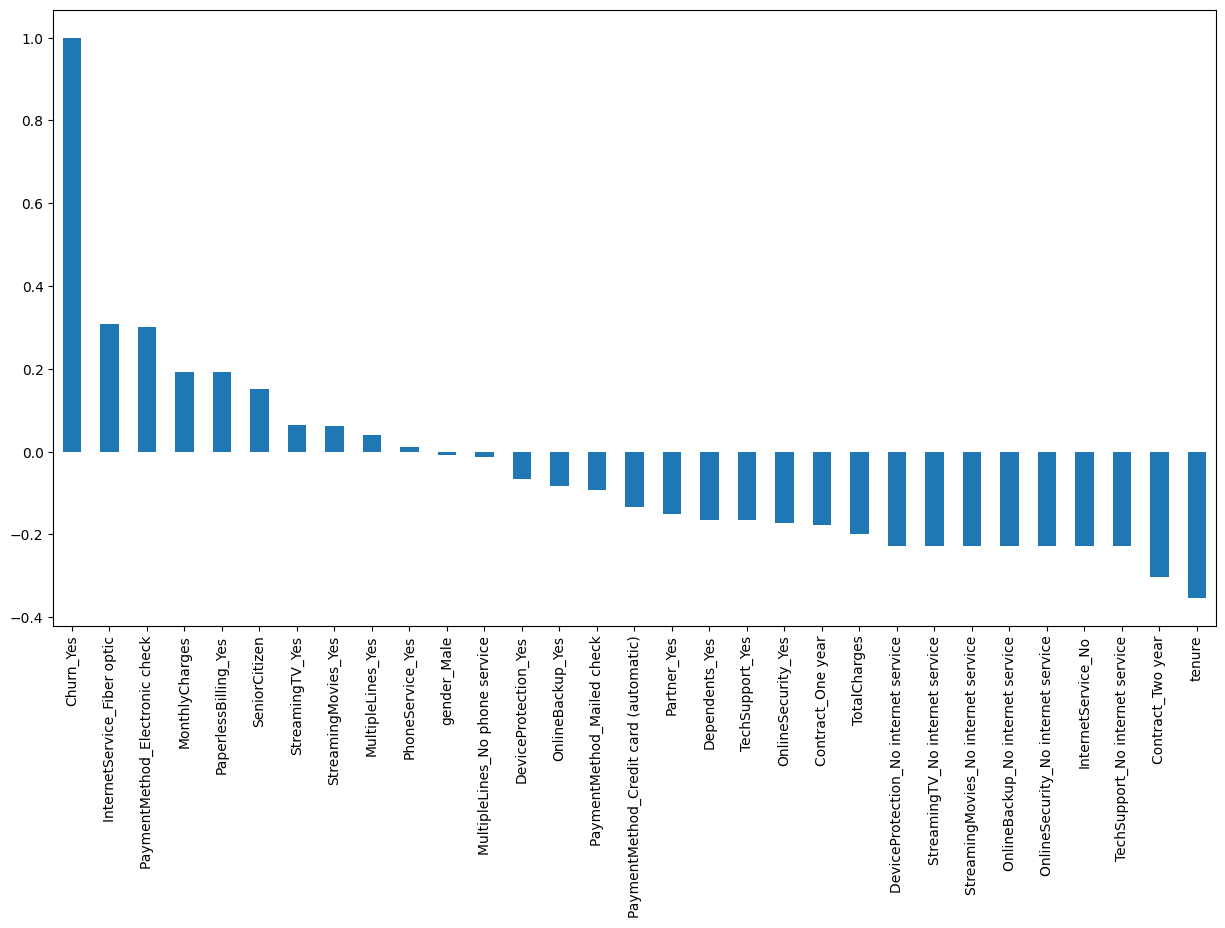

In [19]:

plt.figure(figsize=(15,8))
df.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

### Analysis
There appears to be a positive correlation between customer churn and certain factors such as streaming, absence of online security, and lack of tech support. In contrast, there is a negative correlation between churn and other factors such as longer tenure and two-year contracts.

Interestingly, services that do not rely on an internet connection, such as online backup, tech support, streaming TV, and online security, are negatively associated with churn.

In the following analysis, we will examine these correlations further before moving on to model the data and identify the most significant variables.

In [20]:
counts = df.Churn_Yes.value_counts()
counts
#Data is imbalanced

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [21]:
#saving the data frame into csv file

In [22]:
df.to_csv('adfchurn_presplit_processed.csv', index=False)

In [23]:
# split the data into validation and training set
train_df, test_df = train_test_split(df, test_size=0.3)

# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
target = 'Churn_Yes'
predictors = list(df.columns)
predictors.remove(target)

##### In the above code, we split our data set into 70% training and 30% for testing, this helps the model train and understand the data so that when it faces incoming new data it will be able to do better predictions

### Now we will findout if there are any null values, and if so we will impute the null values with either mean/ median values of the column

In [24]:
numeric_cols_with_nas = list(train_df.isna().sum()[train_df.isna().sum() > 0].index)
numeric_cols_with_nas

['TotalCharges']

In [25]:
imputer = SimpleImputer(strategy="mean")

train_df[numeric_cols_with_nas] = imputer.fit_transform(train_df[numeric_cols_with_nas])
test_df[numeric_cols_with_nas] = imputer.transform(test_df[numeric_cols_with_nas])

fit_transform() is used to both fit and transform the data. The method computes the necessary parameters for the transformation based on the data and then applies the transformation to the data. In other words, it fits the transformation to the data and then transforms it in one step.
transform() is used to transform the data based on parameters that have been computed in a previous step. It applies the transformation to the data without changing the parameters.

We used the mean of the column to fill in the missing data in the respective column,the mean is a good choice to impute missing values. The mean is the sum of all values divided by the number of values, and it represents the average of the data. In a symmetric distribution, the mean is located at the center of the distribution and is a good representation of the typical value.

In [26]:
#the columns that we are going to standardize are seniorcitizens, tenure, monthycharges, totalcharges as the values are in different scales

In [27]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']                
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array


test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object


We apply standardization for our columns so that all the values are in similar scale and easy to analyse when they are in similar scale when compared to different measure which makes it harder for the models to train.

### Adressing the data imbalance in target

In [28]:
train_df.Churn_Yes.value_counts()

0    3589
1    1341
Name: Churn_Yes, dtype: int64

*The data is slightly imbalanced as it is not even 50:50, so we will be undersampling the data so that the data balance is maintained, the balanced dataset will be trained and the models will be able to do better predictions*

In [29]:
# separate features and labels
Xd = train_df.drop('Churn_Yes', axis=1)
yd = train_df['Churn_Yes']
from imblearn.under_sampling import RandomUnderSampler
from __future__ import print_function


# instantiate the RandomUnderSampler object
rus = RandomUnderSampler()

# fit and apply RandomUnderSampler on the data
X_resampled, y_resampled = rus.fit_resample(Xd, yd)

# print the new class distribution
print(pd.Series(y_resampled).value_counts())

0    1341
1    1341
Name: Churn_Yes, dtype: int64


We have taken the train data, then we had done the resampling technique and stored the new data in X_resampled,y_resampled, later we store
**the balanced dataset is now added to a new dataframe, and we will be proceeding futher with the new dataframe since the weights of targets are evenly distributed**

In [30]:
df2=X_resampled
df2['Churn_Yes']=y_resampled
df2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-0.43979,1.213086,-0.333322,0.505634,0,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,-0.43979,0.602169,0.320629,0.543081,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
2,-0.43979,-0.660394,0.219383,-0.469998,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
3,-0.43979,1.498180,0.586193,1.444546,0,0,0,1,0,0,...,1,0,1,0,1,1,1,0,0,0
4,-0.43979,0.561441,0.999477,0.945390,1,0,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,-0.43979,-1.026944,0.677481,-0.738696,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,1
2678,-0.43979,-1.189855,1.200310,-0.858862,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
2679,2.27381,-0.945488,1.185372,-0.599377,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
2680,-0.43979,-0.171660,1.357989,0.309097,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1


In [31]:
df2.Churn_Yes.value_counts()

0    1341
1    1341
Name: Churn_Yes, dtype: int64

### Saving the preprocessed data into respective csv files

In [32]:
train_X = df2[predictors] #Using the new resampled dataframe
train_y = df2[target] # train_target is now a series objecttrain_df.to_csv('df_train_df_churn.csv', index=False)
test_X = test_df[predictors]
test_y = test_df[target] # validation_target is now a series object

In [33]:

train_df.to_csv('df_train_df_churn.csv', index=False)
train_X.to_csv('df_train_X_churn.csv', index=False)
train_y.to_csv('df_train_y_churn.csv', index=False)
test_df.to_csv('df_test_df_churn.csv', index=False)
test_X.to_csv('df_test_X_churn.csv', index=False)
test_y.to_csv('df_test_y_churn.csv', index=False)

### These csv files have the respective train, test data information and later be used as they will be accessed by our model fitting notebook for futher analysis, by this we end our data cleansing part and further move to the analysis and prediction part.

In [34]:
# import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from matplotlib import pyplot as plt
# set random seed to ensure that results are repeatable
np.random.seed(1)

### 1. Load the data into train,test variables

In [35]:
X_train = pd.read_csv("df_train_X_churn.csv")
X_test = pd.read_csv("df_test_X_churn.csv")
y_train = pd.read_csv("df_train_y_churn.csv")
y_test = pd.read_csv("df_test_y_churn.csv")
#Loading the training the test data sets

In [36]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

### 2. Logistic Regression models, with different approaches i.e Linear,L1, L2

Our first model is an logistic regression model, will be applying different approaches for this model itself.
Logistic regression is a statistical method that aims to establish the correlation between a binary dependent variable and one or more independent variables. Its primary objective is to determine the most appropriate model that can forecast the likelihood of the dependent variable taking a specific value, which is typically either 0 or 1.

In [37]:
log_reg_model = LogisticRegression(max_iter=900, penalty= 'none')
_ = log_reg_model.fit(X_train, np.ravel(y_train))

C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [38]:
model_preds = log_reg_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"default logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.750118,0.5,0.831439,0.624467


### 2.1 Change to liblinear solver

In [39]:
log_reg_liblin_model = LogisticRegression(solver='liblinear').fit(X_train, np.ravel(y_train))

In [40]:
model_preds = log_reg_liblin_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"liblinear logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.750118,0.500000,0.831439,0.624467
0,liblinear logistic,0.760057,0.512195,0.835227,0.634989


###  2.2 L2 Regularization

In [41]:
log_reg_L2_model = LogisticRegression(penalty='l2', max_iter=1000)
_ = log_reg_L2_model.fit(X_train, np.ravel(y_train))

In [42]:
model_preds = log_reg_L2_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"L2 logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.750118,0.500000,0.831439,0.624467
0,liblinear logistic,0.760057,0.512195,0.835227,0.634989
0,L2 logistic,0.758164,0.509827,0.835227,0.633166


### 2.3 L1 Regularization

In [43]:
log_reg_L1_model = LogisticRegression(solver='liblinear', penalty='l1')
_ = log_reg_L1_model.fit(X_train, np.ravel(y_train))

In [44]:
model_preds = log_reg_L1_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"L1 logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.750118,0.500000,0.831439,0.624467
0,liblinear logistic,0.760057,0.512195,0.835227,0.634989
0,L2 logistic,0.758164,0.509827,0.835227,0.633166
0,L1 logistic,0.759110,0.511034,0.833333,0.633549


### 2.4 Elastic Net Regularization

In [45]:
log_reg_elastic_model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=1000)
_ = log_reg_elastic_model.fit(X_train, np.ravel(y_train))

In [46]:
model_preds = log_reg_elastic_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Elastic logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

L1, L2, and Elastic Net are regularization techniques used in linear regression models to prevent overfitting and improve the model's predictive power.

L1 regularization, also known as Lasso regression, adds a penalty term to the cost function proportional to the absolute value of the coefficients. This results in a sparse model, meaning it tends to set some coefficients to zero, effectively performing feature selection.

L2 regularization, also known as Ridge regression, adds a penalty term proportional to the square of the coefficients. This results in a model that has smaller coefficients, as compared to the original coefficients, and it performs better in cases where all the features contribute equally to the target variable.

Elastic Net is a combination of L1 and L2 regularization techniques, which balances between the sparsity of L1 and the smoothness of L2 regularization.

Liblinear is a library for solving linear regression problems, including logistic regression. It is widely used for large-scale linear classification problems because of its efficiency and accuracy.

Logistic regression is a binary classification algorithm used to predict the probability of an event occurring (e.g., whether a customer will buy a product or not). It is a type of generalized linear model that models the relationship between the independent variables and the dependent variable using a logistic function. The coefficients of the independent variables are estimated using maximum likelihood estimation.

## 3.0 Summary

Sorted by accuracy, the best models are:

In [47]:
performance.sort_values(by=['Accuracy'],ascending=False)

,model,Accuracy,Precision,Recall,F1
0,liblinear logistic,0.760057,0.512195,0.835227,0.634989
0,Elastic logistic,0.759584,0.511601,0.835227,0.634532
0,L1 logistic,0.759110,0.511034,0.833333,0.633549
0,L2 logistic,0.758164,0.509827,0.835227,0.633166
0,default logistic,0.750118,0.500000,0.831439,0.624467


### So choosing which model is the 'best'

This is very much depending on the profit or loss associated with FP, FN, TP and TN.

Based on the above results, liblinear logistic model performs better amoung all the models as we can observe the values achieved, thought Elastic is close, but the overall results of liblinear logistic model is better

Liblinear logistic model had the best results for all the metrics

### 4.0 SVM classification models

The goal of SVM is to find the best hyperplane that separates the data into different classes by maximizing the margin between the hyperplane and the closest data points of each class.
we will be using few kernel tricks, kernel trick is a powerful technique used in SVM algorithms to transform non-linearly separable data into a linearly separable space, allowing SVM to classify the data accurately and efficiently.
In SVM, each data point is represented as a vector in a high-dimensional space, and the hyperplane is a boundary that separates the data points based on their characteristics. The data points that are closest to the hyperplane are called support vectors, and they determine the location and orientation of the hyperplane.

### 4.1 Fit a SVM classification model using linear kernal

In [53]:
from sklearn.svm import SVC
svm_lin_model = SVC(kernel="linear")
_ = svm_lin_model.fit(X_train, np.ravel(y_train))

In [54]:
model_preds = svm_lin_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance= pd.concat([performance, pd.DataFrame({'model':"linear svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 4.2 Fit a SVM classification model using rbf kernal

In [55]:
svm_rbf_model = SVC(kernel="rbf", C=10, gamma='scale')
_ = svm_rbf_model.fit(X_train, np.ravel(y_train))

In [56]:
model_preds = svm_rbf_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance= pd.concat([performance, pd.DataFrame({'model':"rbf svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 4.3 Fit a SVM classification model using polynomial kernal

In [57]:
svm_poly_model = SVC(kernel="poly", degree=3, coef0=1, C=10)
_ = svm_poly_model.fit(X_train, np.ravel(y_train))

In [58]:
model_preds = svm_poly_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance= pd.concat([performance, pd.DataFrame({'model':"poly svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

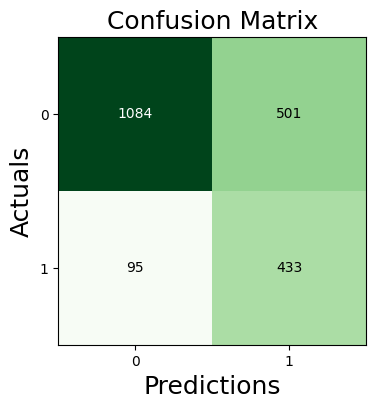

In [59]:
fig, ax = plot_confusion_matrix(c_matrix, figsize=(4, 4), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

***The above confusion matrix gives us a depection of all the True positives, true negatives, false positives, false negatives***

the true positivies indicates when actual and the predicted values are the same, i.e if a customer churned and model also predicted that the customer churned and similarly,

the true negatives when a customer didnt churn and model also predicted that the customer didnt churn. We can see from the confusion matrix for the above model, the number of TN are higher.

the false positves are when a customer didnt churn but predicted as churn; **this is where we need to keep it to the minimum as the cost associated with it will be higher as we dont want false predictions that effects the business**

the false negatives are when customer churns but predicted as didnt churn.

In [60]:
## Summary

performance.sort_values(by=['Accuracy'],ascending= False)

,model,Accuracy,Precision,Recall,F1
0,liblinear logistic,0.760057,0.512195,0.835227,0.634989
0,Elastic logistic,0.759584,0.511601,0.835227,0.634532
0,L1 logistic,0.759110,0.511034,0.833333,0.633549
0,L2 logistic,0.758164,0.509827,0.835227,0.633166
0,default logistic,0.750118,0.500000,0.831439,0.624467
0,linear svm,0.736394,0.484290,0.846591,0.616127
0,rbf svm,0.735920,0.483259,0.820076,0.608146
0,poly svm,0.717937,0.463597,0.820076,0.592339


### Analysis

SVM is a classification algorithm that has achieved significant performance. It categorizes the data by locating the optimum hyperplane and optimizing the distance between points. In order to demonstrate how it works with support vector machines, a kernel function will be introduced. We have used poly kernal.

In SVM classification issues when the data is not linearly separable, the polynomial kernel is frequently utilized.
The polynomial kernel has a number of parameters that can be tuned to improve its performance, including the degree of the polynomial and the coefficient of the polynomial.

In logistic regression, the goal is to find the best set of coefficients for a linear equation that models the relationship between the independent variables and the probability of the dependent variable being in a particular category. The coefficients are determined using maximum likelihood estimation.
Liblinear logistic regression is a variant of logistic regression that uses the liblinear library to solve the optimization problem. The liblinear library uses a coordinate descent algorithm to solve the optimization problem efficiently. This algorithm updates one variable at a time, which makes it well-suited for large-scale problems.

Liblinear logistic regression has several advantages, including its efficiency and ability to handle large-scale problems. It is also a robust algorithm that can handle noisy or missing data. However, it is important to note that logistic regression assumes a linear relationship between the independent variables and the dependent variable. If this assumption is not met, the model may not be accurate.

Overall, the logistic regression is a simple and interpretable machine learning algorithm that can be used for binary classification tasks when the relationship between the predictor variables and the binary outcome is roughly linear. It is commonly used in many applications, including finance, and marketing.



## 5.0 Decision Tree 
The decision tree algorithm works by recursively splitting the data into smaller subsets based on the most significant feature at each step. The algorithm selects the feature that maximizes the information gain, which is a measure of the difference in entropy (or impurity) before and after the split. Entropy measures the randomness or disorder of the data, and the goal of the decision tree is to minimize the entropy or impurity at each split.

In a classification problem, the decision tree predicts the class label of a new instance by traversing the tree from the root to a leaf node based on the values of the features of the instance. The class label of the leaf node reached by the instance is the predicted class label. In a regression problem, the decision tree predicts the value of a new instance by traversing the tree and returning the average value of the leaf nodes reached by the instance.

In [61]:
dtree=DecisionTreeClassifier()

Fit the model to the training data

In [62]:
_ = dtree.fit(X_train, y_train)

Review of the performance of the model on the validation/test data

In [63]:
y_pred = dtree.predict(X_test)

In [64]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>>Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>>Accuracy Score: 0.677709417889257
Recall Score:     0.7064393939393939
Precision Score:  0.41490545050055616
F1 Score:         0.5227750525578136


Save the result from this model

In [65]:
dtree_acc = accuracy_score(y_test, y_pred)

## Prediction with RandomForest (using default parameters)

Like all our classifiers, RandomeForestClassifier has a number of parameters that can be adjusted/tuned. In this example below, we simply accept the defaults. You may want to experiment with changing the defaul values and also use GridSearchCV to explore ranges of values.

* n_estimators: The number of trees in the forsest
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is 100.  
* max_depth: The maximum depth per tree. 
    - Deeper trees might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is None, which allows the tree to grow without constraint.
* See the SciKit Learn documentation for more details. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [66]:
rforest = RandomForestClassifier()

In [67]:
_ = rforest.fit(X_train, np.ravel(y_train))

In [68]:
y_pred = rforest.predict(X_test)

In [69]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>>Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{' Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>>Accuracy Score: 0.7444391859914813
 Recall Score:    0.8049242424242424
Precision Score:  0.49303944315545245
F1 Score:         0.6115107913669064


Save the accuracy result from this model

In [70]:
rforest_acc = accuracy_score(y_test, y_pred)

## NOTE: In this next section, GridSearch will use K Fold Cross Validation 

K-Fold cross validation is used to avoid overfitting. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. 

![cross validation diagram](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


## Model the data

Conduct an initial random search across a wide range of possible parameters.

In [71]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}


In [72]:

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=300,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)


In [73]:

_ = rand_search.fit(X_train,np.ravel(y_train))

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
The best accuracy score is 0.7546603574307236
... with parameters: {'min_samples_split': 49, 'min_samples_leaf': 84, 'min_impurity_decrease': 0.0056, 'max_leaf_nodes': 39, 'max_depth': 10, 'criterion': 'entropy'}


C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validat

In [74]:
c_matrix = confusion_matrix(y_test, rand_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.7515381 Precision=0.5017751 Recall=0.8030303 F1=0.6176256


Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

In [75]:
score_measure = "accuracy"
kfolds = 5
param_grid = {
    'min_samples_split': np.arange(47,52),  
    'min_samples_leaf': np.arange(80,86),
    'min_impurity_decrease': np.arange(0.0055, 0.0057, 0.0001),
    'max_leaf_nodes': np.arange(38,40), 
    'max_depth': np.arange(8,12), 
    'criterion': ['entropy'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
The best accuracy score is 0.7546603574307236
... with parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 38, 'min_impurity_decrease': 0.0055, 'min_samples_leaf': 80, 'min_samples_split': 47}


In [76]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.7515381 Precision=0.5017751 Recall=0.8030303 F1=0.6176256


## 5.0 Importance of features

In [77]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.  , 0.14, 0.04, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.11,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.06, 0.25, 0.39, 0.  , 0.  , 0.  , 0.  ])

## 6.0 Diagrams of DTrees

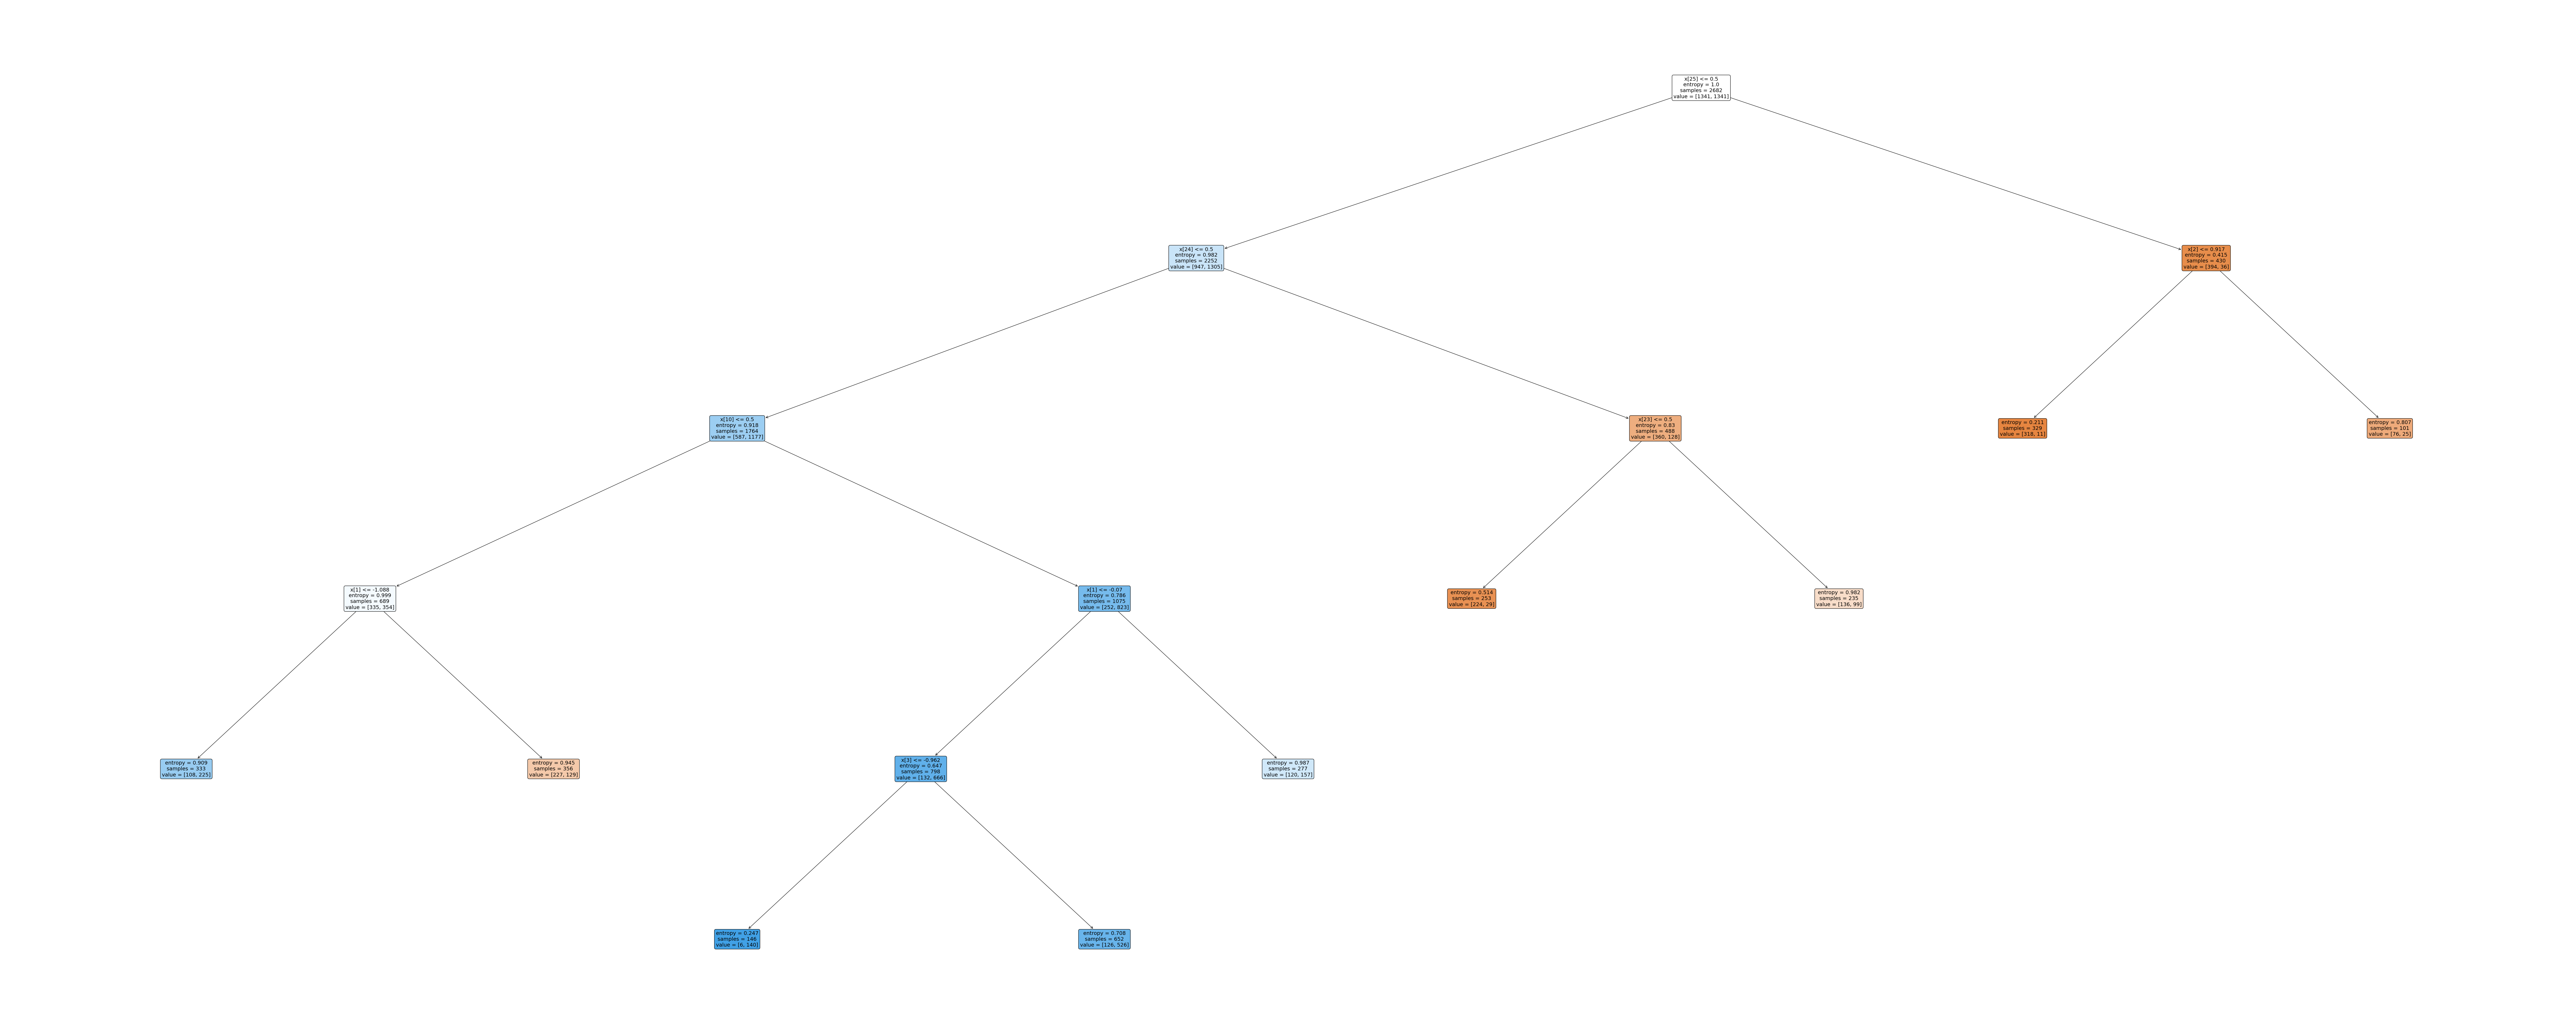

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_,  
              filled=True, 
              rounded=True, 
              fontsize=14)

## Prediction with ADABoost (using default parameters)

Like all our classifiers, ADABoostClassifier has a number of parameters that can be adjusted/tuned. In this example below, we simply accept the defaults. You may want to experiment with changing the defaul values and also use GridSearchCV to explore ranges of values.

* max_depth: The maximum depth per tree. 
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is None (meaning, the tree can grow to a point where all leaves have 1 observation).
* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. 
    - A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
    - Larger learning rates may not converge on a solution.
    - The value must be between 0 and 1. Default is 0.3.
* n_estimators: The number of trees in our ensemble. 
    - Equivalent to the number of boosting rounds.
    - The value must be an integer greater than 0. Default is 100.
* See the SciKit Learn documentation for more details. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [42]:
aboost = AdaBoostClassifier()

In [43]:
_ = aboost.fit(X_train, np.ravel(y_train))

In [44]:
y_pred = aboost.predict(X_test)

In [45]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
Accuracy Score:   0.7486985328916232
Recall Score:     0.8276515151515151
Precision Score:  0.4982896237172178
F1 Score:         0.6220640569395018


Save the accuracy result from this model

In [46]:
aboost_acc = accuracy_score(y_test, y_pred)

In [47]:
n_estimators = [int(x) for x in np.linspace(1, 1000, 5)]
n_estimators

[1, 250, 500, 750, 1000]

### Using ada boost with parameter tuning

In [48]:
#Defining parameters
n_estimators = [1,50,100,250,300,350,500,750]
learning_rate = np.arange(0.1,1.0,0.1)
random_seed=1
param_grid_random = { 'n_estimators': n_estimators,
                      'learning_rate': learning_rate,
                     }

In [49]:
#Initializing Random search
best_random_search_model = RandomizedSearchCV(
        estimator=AdaBoostClassifier(random_state=random_seed), 
        scoring='accuracy', 
        param_distributions=param_grid_random, 
        n_iter = 60, 
        cv=10, 
        verbose=0, 
        n_jobs = -1,
        random_state=random_seed
    )
best_random_search_Ada_model = best_random_search_model.fit(X_train,np.ravel(y_train))

In [50]:
#Finding Best parameters
random_search_best_Ada_params = best_random_search_Ada_model.best_params_
print('Best parameters found: ', random_search_best_Ada_params)

Best parameters found:  {'n_estimators': 100, 'learning_rate': 0.30000000000000004}


In [51]:
#Printing the results
y_pred = best_random_search_Ada_model.predict(X_test)

print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")
print("************************************")

************************************
Recall Score:     0.7486985328916232
Accuracy Score:   0.7486985328916232
Precision Score:  0.8209676686104611
F1 Score:         0.7644657510363145
************************************


In [52]:
adapram=accuracy_score(y_test, y_pred)

### Analysis

## Prediction with GradientBoostingClassifier

Like all our classifiers, GradientBoostingClassifier has a number of parameters that can be adjusted/tuned. In this example below, we simply accept the defaults. You may want to experiment with changing the defaul values and also use GridSearchCV to explore ranges of values.

* max_depth: The maximum depth per tree. 
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is None (meaning, the tree can grow to a point where all leaves have 1 observation).
* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. 
    - A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
    - Larger learning rates may not converge on a solution.
    - The value must be between 0 and 1. Default is 0.3.
* n_estimators: The number of trees in our ensemble. 
    - Equivalent to the number of boosting rounds.
    - The value must be an integer greater than 0. Default is 100.
* See the SciKit Learn documentation for more details. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [90]:
gboost = GradientBoostingClassifier()

In [91]:
_ = gboost.fit(X_train, np.ravel(y_train))

In [92]:
y_pred = gboost.predict(X_test)

In [93]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
Accuracy Score:   0.7486985328916232
Recall Score:     0.8314393939393939
Precision Score:  0.4982973893303065
F1 Score:         0.6231369765791341


Save the accuracy result from this model

In [94]:
gboost_acc = accuracy_score(y_test, y_pred)

## Prediction with XGBoost

Like all our classifiers, XGBoost has a number of parameters that can be adjusted/tuned. In this example below, we simply accept the defaults. You may want to experiment with changing the defaul values and also use GridSearchCV to explore ranges of values.

* max_depth: The maximum depth per tree. 
    - A deeper tree might increase the performance, but also the complexity and chances to overfit.
    - The value must be an integer greater than 0. Default is 6.
* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. 
    - A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
    - The value must be between 0 and 1. Default is 0.3.
* n_estimators: The number of trees in our ensemble. 
    - Equivalent to the number of boosting rounds.
    - The value must be an integer greater than 0. Default is 100.
* colsample_bytree: Represents the fraction of columns to be randomly sampled for each tree. 
    - It might improve overfitting.
    - The value must be between 0 and 1. Default is 1.
* subsample: Represents the fraction of observations to be sampled for each tree. 
    - A lower values prevent overfitting but might lead to under-fitting.
    - The value must be between 0 and 1. Default is 1.
* See the XGBoost documentation for more details. https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn 

In [95]:
xgboost = XGBClassifier()

In [96]:
_ = xgboost.fit(X_train, np.ravel(y_train))

In [97]:
y_pred = xgboost.predict(X_test)

In [98]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>>Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>>Accuracy Score: 0.7307146237576905
Recall Score:     0.7840909090909091
Precision Score:  0.476409666283084
F1 Score:         0.5926986399427344


Save the recall result from this model

In [99]:
xgboost = accuracy_score(y_test, y_pred)

# XG Boost with parameter tuning with random search & grid search

In [100]:
params = {
# number of trees in the ensemble which is the same number of boosting rounds
    'n_estimators':[500],
# Minimum sum of instance weight (hessian) needed in a child.
    'min_child_weight':[4,5], 
# Minimum loss reduction required to make a further partition on a leaf node of the tree
    'gamma':[i/10.0 for i in range(3,6)],  
# fraction of observations that need to be sampled for each tree
    'subsample':[i/10.0 for i in range(6,11)],
# subsample ratio of columns when constructing each tree
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
# Depth of tree
    'max_depth': [2,3,4,6,7],
# Learning objective
    'objective': ['reg:squarederror'],
# Choosing which booster to use -gbtree for tree based models and gblinear for linear functions.
    'booster': ['gbtree'],
# Evaluation metrics for validation data
    'eval_metric': ['rmse'],
# Step size at each iteration
    'eta': [i/10.0 for i in range(3,6)],
}

#### Hyperparameter tuning with Random Search

In [101]:
# Default model without any parameters
XGB_default = XGBClassifier(random_state=1)
# Randomized search applying a range of parameters
best_random_search_model = RandomizedSearchCV(
        estimator=XGB_default, 
        scoring='accuracy', 
        param_distributions=params, 
        n_iter = 50, 
        cv=5, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, np.ravel(y_train))
# Best parameters
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'subsample': 1.0, 'objective': 'reg:squarederror', 'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 2, 'gamma': 0.4, 'eval_metric': 'rmse', 'eta': 0.4, 'colsample_bytree': 0.7, 'booster': 'gbtree'}


#### Hyperparameter tuning with Grid Search

In [102]:
%%capture --no-display

# Create the grid parameter:
grid_xg = {'max_depth': [3,5],
           'booster': ['gbtree'], 
           'subsample': [0.9,1.0],
           'objective': ['reg:squarederror'],  
           'n_estimators': [450,500],
           'gamma': [0.3,0.4],
           'eval_metric': ['rmse'],
           'eta': [0.4,0.5],
           'colsample_bytree': [0.9,1.1],
           'min_child_weight': [4,5]}

xgtree = XGBClassifier(random_state=1)
# Create the grid:
gs_xg = GridSearchCV(xgtree, grid_xg, cv=10, n_jobs=-1)

# Fit using grid search:
gs_xg.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.9, 1.1],
                         'eta': [0.4, 0.5], 'eval_metric': ['rmse'],
                         'gamma': [0.3, 0.4], 'max_depth': [3, 5],
                         'min_child_weight': [4, 5], 'n_estimators': [450, 500],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.9, 1.0]})

In [103]:
y_pred_XGtree = gs_xg.predict(X_test)
print(f"{'>>Accuracy Score: ':18}{accuracy_score(y_test, y_pred_XGtree)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_XGtree)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_XGtree)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_XGtree)}")

>>Accuracy Score: 0.7368670137245622
Recall Score:     0.803030303030303
Precision Score:  0.4840182648401826
F1 Score:         0.6039886039886039


In [104]:
xgb_pr= accuracy_score(y_test, y_pred_XGtree)

In [105]:
xgb_pr

0.7368670137245622

##  Summarized results    

In this section We have presented approach, results, and discussion of findings. 


In [106]:
performance.sort_values(by=['Accuracy'],ascending= False)

,model,Accuracy,Precision,Recall,F1
0,liblinear logistic,0.760057,0.512195,0.835227,0.634989
0,Elastic logistic,0.759584,0.511601,0.835227,0.634532
0,L1 logistic,0.759110,0.511034,0.833333,0.633549
0,L2 logistic,0.758164,0.509827,0.835227,0.633166
0,default logistic,0.750118,0.500000,0.831439,0.624467
0,linear svm,0.736394,0.484290,0.846591,0.616127
0,rbf svm,0.735920,0.483259,0.820076,0.608146
0,poly svm,0.717937,0.463597,0.820076,0.592339


In [107]:
print("accuracy scores...")
print(f"{'Decision Tree:':18}{dtree_acc}")
print(f"{'Random Forest:':18}{rforest_acc}")
print(f"{'Ada Boosted Tree:':18}{aboost_acc}")
print(f"{'Gradient Tree:':18}{gboost_acc}")
print(f"{'XGBoost Tree:':18}{xgboost}")
print(f"{'XG Boost param:':18}{xgb_pr}")
print(f"{'Ada Boost param:':18}{adapram}")

accuracy scores...
Decision Tree:    0.677709417889257
Random Forest:    0.7444391859914813
Ada Boosted Tree: 0.7486985328916232
Gradient Tree:    0.7486985328916232
XGBoost Tree:     0.7307146237576905
XG Boost param:   0.7368670137245622
Ada Boost param:  0.7486985328916232


In [52]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

# MLP Classifier

In [53]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 2.5 s
Wall time: 6.79 s


C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 5.98 ms


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1585
           1       0.43      0.79      0.56       528

    accuracy                           0.68      2113
   macro avg       0.67      0.72      0.66      2113
weighted avg       0.78      0.68      0.71      2113



In [112]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [.2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.01, 0.1, 0.2, 0.5],
    'max_iter': [1000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'solver': 'sgd', 'max_iter': 1000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (70, 50, 40), 'alpha': 1, 'activation': 'tanh'}
CPU times: total: 22.2 s
Wall time: 6min 32s


In [113]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1585
           1       0.51      0.80      0.62       528

    accuracy                           0.76      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.82      0.76      0.77      2113

CPU times: total: 31.2 ms
Wall time: 52.1 ms


In [114]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': [ 'relu'],
    'solver': ['adam'],
    'alpha': [.2, .5, .7],
    'learning_rate': ['invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [1000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'relu', 'alpha': 0.2, 'hidden_layer_sizes': (70,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.15, 'max_iter': 1000, 'solver': 'adam'}
CPU times: total: 1.16 s
Wall time: 38.7 s


In [115]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1585
           1       0.49      0.84      0.62       528

    accuracy                           0.75      2113
   macro avg       0.71      0.78      0.72      2113
weighted avg       0.82      0.75      0.76      2113

CPU times: total: 31.2 ms
Wall time: 33.5 ms


# Deep Neural Networks

We are going to use keras functionality to added hidden layers which we will be implementing in the neural networks.
In machine learning, MLP typically stands for "Multi-Layer Perceptron". It's a type of artificial neural network that consists of multiple layers of interconnected nodes, or "neurons", which process and transform input data to produce an output.

The first layer is the input layer, which receives input data. The following layers are called "hidden layers", and they perform computations on the input data using weights and biases, which are adjusted during the training process to minimize the difference between the network's output and the desired output. The last layer of the MLP is the output layer, which produces the final output.

MLPs are often used in supervised learning tasks, such as classification and regression, and they are capable of learning complex relationships between inputs and outputs. They are also a type of feedforward neural network, meaning that the information flows only in one direction, from input to output, without loops or feedback connections.

we create a Sequential model and add four Dense layers to it. The first layer has 100 units, uses the ReLU activation function, and takes an input shape of (30). The second layer has 80 units, uses the tanh activation function, and other respective layers have 40,30 with elu and leakuRelu and final layer with 2 is the output layer. We then compile the model with a  cross-entropy loss function, stochastic gradient descent optimizer, and accuracy metric.

In [48]:
from tensorflow import keras


In [49]:
X_test.shape

(2113, 30)

In [50]:
#The first input layer is set as 30, as the shape of our data set is 30 features

In [62]:
%%time
from tensorflow.keras.layers import Dense, LeakyReLU

# create model stucture
model = keras.models.Sequential()
model.add(keras.layers.Input(30))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(80, activation='tanh'))
model.add(keras.layers.Dense(40, activation='elu'))
model.add(keras.layers.Dense(30, activation=LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(2, activation='sigmoid')) 


# compile 
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# we had overidden the defaults for the optimizer....


CPU times: total: 46.9 ms
Wall time: 73.4 ms


In [63]:
%%time



# fit the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=50)


Epoch 1/20
54/54 [==============================] - 1s 7ms/step - loss: 0.5408 - accuracy: 0.7356 - val_loss: 0.5104 - val_accuracy: 0.7553
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7625 - val_loss: 0.5113 - val_accuracy: 0.7388
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7658 - val_loss: 0.5031 - val_accuracy: 0.7549
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.7673 - val_loss: 0.5086 - val_accuracy: 0.7364
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7703 - val_loss: 0.4940 - val_accuracy: 0.7534
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.4713 - accuracy: 0.7703 - val_loss: 0.5669 - val_accuracy: 0.7198
Epoch 7/20
54/54 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7811 - val_loss: 0.5024 - val_accuracy: 0.7487
Epoch 8/20
54/54 [==

In [64]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores
# In results, first is loss, second is accuracy

[0.5304654836654663, 0.7529578804969788]

In [65]:
# let's format this into a better output...

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.53
accuracy: 75.30%


## Wide and Deep Network

In [129]:
#Define the model: for multi-class

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=30))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(80, activation='elu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

*We have used binary_crossentropy to complie our model as we are working on binary target data*

**The final layer which is the output layer has only one neuron and the activation function that we use is the sigmoid function as our target is binary**
**For the hidden layers we have added different activation functions such as relu, tanh, elu and number of layers**

In [66]:
# Compile model

#Optimizer:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#we used binarycrossentropy as our loss function

In [131]:
# Fit the model

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50, batch_size=100)

Epoch 1/50
27/27 [==============================] - 1s 10ms/step - loss: 0.5649 - accuracy: 0.7125 - val_loss: 0.4910 - val_accuracy: 0.7662
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.4970 - accuracy: 0.7573 - val_loss: 0.5156 - val_accuracy: 0.7459
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.4893 - accuracy: 0.7625 - val_loss: 0.4503 - val_accuracy: 0.7653
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.4824 - accuracy: 0.7692 - val_loss: 0.5758 - val_accuracy: 0.7042
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 0.4812 - accuracy: 0.7644 - val_loss: 0.4695 - val_accuracy: 0.7572
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 0.4730 - accuracy: 0.7696 - val_loss: 0.4699 - val_accuracy: 0.7629
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.4734 - accuracy: 0.7714 - val_loss: 0.4755 - val_accuracy: 0.7596
Epoch 8/50
27/27 [=

In [132]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores

# In results, first is loss, second is accuracy

[0.7877823114395142, 0.7013724446296692]

In [113]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.63
accuracy: 73.88%


## RandomGridSearch

In [114]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier
from keras.initializers import GlorotNormal

score_measure = "accuracy"
kfolds = 5

def build_clf(hidden_layer_sizes, dropout):
    ann = tf.keras.models.Sequential()
    ann.add(keras.layers.Input(shape=30)),
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, kernel_initializer= tf.keras.initializers.GlorotNormal(), 
                                     bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    ann.add(tf.keras.layers.Dense(10, activation='softmax'))
    ann.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann


CPU times: total: 0 ns
Wall time: 0 ns


In [1]:
#we are using accuracy as our metric

*We have used binary_crossentropy to complie our model as we are working on binary target data*

For more information on dense layers and initializers, see the following:
* https://keras.io/api/layers/core_layers/dense/
* https://keras.io/api/layers/initializers/

In [115]:
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=30,
    dropout = 0.0
)


In [117]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

params = {
    'optimizer__learning_rate': [0.0005, 0.001, 0.005],
    'model__hidden_layer_sizes': [(50,),(70,), (100,), (100, 90)],
    'model__dropout': [0, 0.1],
    'batch_size':[20, 60],
    'epochs':[10, 50],
    'optimizer':["adam",'sgd']
}
keras_clf.get_params().keys()



dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_layer_sizes', 'dropout', 'class_weight'])

In [67]:
#We have used few optimal parameters as training with lot of paramaters take lot of resource time nonetheless these parameters have provided with a good results

In [118]:
rnd_search_cv = RandomizedSearchCV(estimator=keras_clf, param_distributions=params, scoring='accuracy', n_iter=50, cv=5)

import sys
sys.setrecursionlimit(4500) # note: the default is 3000 (python 3.9)

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
callback = [earlystop]

_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


9/9 [==============================] - 0s 1ms/step


In [119]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.001,
 'optimizer': 'sgd',
 'model__hidden_layer_sizes': (50,),
 'model__dropout': 0,
 'epochs': 50,
 'batch_size': 20}

In [120]:
best_net = rnd_search_cv.best_estimator_
print(rnd_search_cv.best_params_)

{'optimizer__learning_rate': 0.001, 'optimizer': 'sgd', 'model__hidden_layer_sizes': (50,), 'model__dropout': 0, 'epochs': 50, 'batch_size': 20}


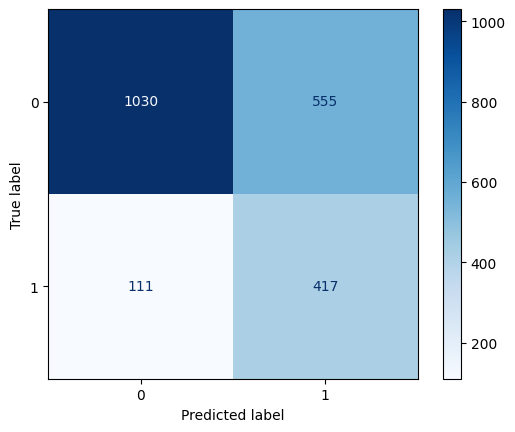

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [121]:
%%time
from sklearn.metrics import classification_report

y_pred = best_net.predict(X_test)
print(classification_report(y_test, y_pred))

106/106 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1585
           1       0.51      0.83      0.63       528

    accuracy                           0.76      2113
   macro avg       0.72      0.78      0.72      2113
weighted avg       0.82      0.76      0.77      2113

CPU times: total: 141 ms
Wall time: 262 ms


## Deep Network

In [54]:
from tensorflow import keras
from tensorflow.keras import layers

In [61]:
model_deep = keras.models.Sequential()
model_deep.add(keras.layers.Input(30))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="tanh"))
model_deep.add(keras.layers.Dense(1, activation="sigmoid"))

In [62]:
model_deep.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [63]:
history = model_deep.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
84/84 [==============================] - 1s 6ms/step - loss: 0.6403 - accuracy: 0.7081 - val_loss: 0.5787 - val_accuracy: 0.7629
Epoch 2/50
84/84 [==============================] - 0s 4ms/step - loss: 0.5688 - accuracy: 0.7562 - val_loss: 0.5438 - val_accuracy: 0.7435
Epoch 3/50
84/84 [==============================] - 0s 4ms/step - loss: 0.5298 - accuracy: 0.7584 - val_loss: 0.5021 - val_accuracy: 0.7577
Epoch 4/50
84/84 [==============================] - 0s 4ms/step - loss: 0.5129 - accuracy: 0.7599 - val_loss: 0.4975 - val_accuracy: 0.7549
Epoch 5/50
84/84 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7629 - val_loss: 0.5084 - val_accuracy: 0.7501
Epoch 6/50
84/84 [==============================] - 0s 4ms/step - loss: 0.5001 - accuracy: 0.7625 - val_loss: 0.4834 - val_accuracy: 0.7643
Epoch 7/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.7670 - val_loss: 0.4872 - val_accuracy: 0.7610
Epoch 8/50
84/84 [==

In [64]:
loss, accuracy = model_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

67/67 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7553
Loss 0.48074
Accuracy 0.7553


In [65]:
model_deep.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               6200      
                                                                 
 dense_9 (Dense)             (None, 200)               40200     
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 86,801
Trainable params: 86,801
Non-trainable params: 0
_________________________________________________________________


67/67 [==============================] - 0s 1ms/step


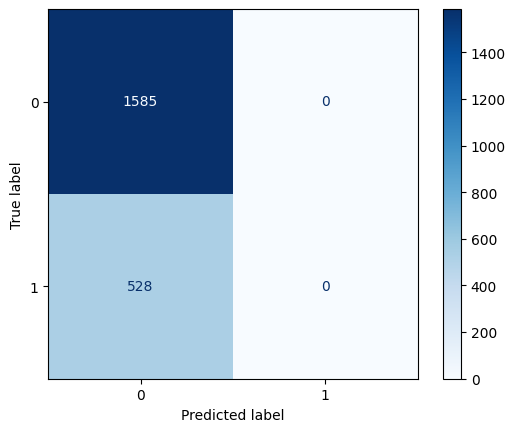

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


# display the confusion matrix
y_pred = model_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

###### WIDE & DEEP network using same amout of hidden layers

In [71]:
input_ = keras.layers.Input(30)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_wide_deep = keras.Model(inputs=[input_], outputs=[output])

In [72]:
model_wide_deep.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [73]:
history = model_wide_deep.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
84/84 [==============================] - 1s 4ms/step - loss: 0.6399 - accuracy: 0.6506 - val_loss: 0.5885 - val_accuracy: 0.7459
Epoch 2/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7327 - val_loss: 0.5508 - val_accuracy: 0.7487
Epoch 3/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7479 - val_loss: 0.5334 - val_accuracy: 0.7468
Epoch 4/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7491 - val_loss: 0.5256 - val_accuracy: 0.7468
Epoch 5/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7509 - val_loss: 0.5219 - val_accuracy: 0.7463
Epoch 6/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.7509 - val_loss: 0.5226 - val_accuracy: 0.7430
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5090 - accuracy: 0.7532 - val_loss: 0.5042 - val_accuracy: 0.7534
Epoch 8/50
84/84 [==

In [74]:
loss, accuracy = model_wide_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

67/67 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7586
Loss 0.47721
Accuracy 0.7586


In [75]:
model_wide_deep.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 128)          3968        ['input_5[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 128)          16512       ['dense_17[0][0]']               
                                                                                                  
 dense_19 (Dense)               (None, 128)          16512       ['dense_18[0][0]']               
                                                                                            

67/67 [==============================] - 0s 1ms/step


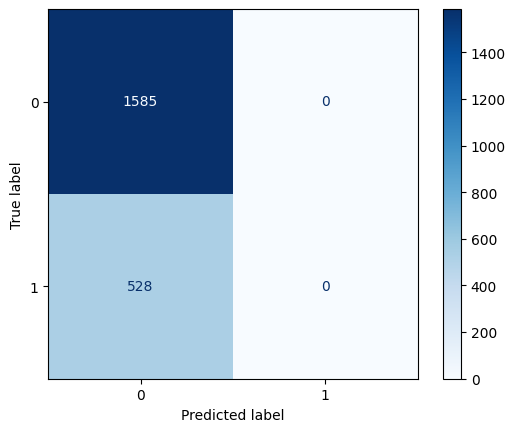

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7501    1.0000    0.8572      1585
           1     0.0000    0.0000    0.0000       528

    accuracy                         0.7501      2113
   macro avg     0.3751    0.5000    0.4286      2113
weighted avg     0.5627    0.7501    0.6430      2113



C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhargav Lakkireddy\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

**We have implemented keras using different networks, however our first model where we tweated the activation function gave us the better accuracy**

# Results & Dicussion

From the above tests, we had initially performed the decision tree, random forest and also the boosting techniques that we had covered, from the tests we got the results for our metrics and we had considered accuracy. 
While recall is a suitable metric to employ when false negatives are costly, precision is preferable when false positives carry a high cost. It is important to consider both metrics together, as they may entail trade-offs between them. A high recall score may lead to a lower precision score and vice versa. Therefore, the choice of metric should be determined by the specific context and objectives of the problem at hand.


Recall is a performance metric that is particularly valuable when identifying positive cases is more critical than avoiding false positives. Situations where false negatives carry a higher cost than false positives.

When comparing with ada boost, Not only accuracy, but we can see that the overall performance of our model has also increased with adaboost parameter tuned version, as the performance metrics have significantly better results. Accuracy measures the proportion of correctly classified instances out of the total instances in the dataset. In the context of a churn prediction model, accuracy measures the proportion of correctly identified churners and non-churners out of the total customers. However, accuracy alone may not be sufficient, as it doesn't take into account the potential cost of false positives and false negatives.

The regression models have also performed pretty well for our data & best of them was the liblinear logistic model, in the end these are close call, Regression models are often more robust than SVM or Decision Trees to outliers and noise in the data.

Classification accuracy measures the proportion of correct predictions made by the model out of all predictions made on the dataset. In the context of customer churn prediction, accuracy measures the proportion of customers for whom the model correctly predicts their churn or retention status. We will also be comparing the F1 score as it is a balance between Precision & recall also, since logistic model also has the better F1 score of 0.64 among other models.

It is important to note that accuracy is not always the best metric to use for evaluation, especially if the dataset is imbalanced, meaning that the number of instances in one class greatly outnumbers the other. In such cases, metrics like precision, recall, F1 score, or ROC AUC may be more appropriate for evaluation.
Since initially we had balanced the training data we got good results when we predicted using test values.

However, our Telco Customer Churn dataset is not significantly imbalanced, **accuracy is a good metric to use to evaluate the performance of the model in predicting customer churn.**

The EarlyStopping callback is also defined, which is used to stop the training process if the validation loss does not improve for a specified number of epochs (patience=5 in this case). This helps to prevent overfitting and improve the generalization performance of the model.
in a neural network model, the weights refer to the numerical values assigned to the connections between the neurons in the network. These weights are adjusted during training to minimize the difference between the predicted output of the model and the true output.

Once a model is trained, the weights can be saved and loaded for later use. This is useful if we want to make predictions on new data without having to retrain the model from scratch.

The rnd_search_cv.fit function is then called with the training data X_train and y_train, along with the callbacks parameter set to the EarlyStopping callback. The verbose parameter is set to 0, which means that no progress information will be displayed during training.

*We can see that the accuracyis at 0.76 similarly the macro, weight averages have also slightly improved compared to previous attempt.*

We have used the MLP classifier with ann and also implemented sequential keras

## Conclusion

One of the key features of Keras is its compatibility with both CPU and GPU computation, which makes it possible to train large neural networks quickly on powerful hardware.

 MLP is a type of feedforward neural network that consists of multiple layers of interconnected nodes. The neurons in each layer are connected to the neurons in the adjacent layers, and they pass information in a forward direction (from input layer to output layer) without any loops or feedback. Each neuron applies a mathematical function to the inputs it receives, and the output of the function is passed to the next layer.

Keras Sequential model is a high-level neural networks API in the Keras library, which is a popular open-source deep learning framework. It allows users to easily create and train neural networks by simply adding layers to the model in a sequential manner. In a Sequential model, each layer is connected to the previous layer, and there is only one input and one output. This makes it a simple yet powerful tool for developing various types of neural networks, including MLPs.

Overall, MLP and Keras Sequential model are both widely used techniques for developing and training neural networks in the field of deep learning.

'kernel_initializer' is a parameter specifies the initialization function to use for the weights in a layer of the network. The weights, also known as the kernel, determine the function that the layer computes. kernel_initializer can have a significant impact on the performance of the neural network.TensorFlow is widely used in both research and industry for a variety of tasks such as image and speech recognition, natural language processing, and recommender systems.

MLP and Keras are good choices when dealing with complex, non-linear relationships in the data, while SVM, AdaBoost, and decision tree are good choices for simpler problems that require interpretable models or for problems with small datasets. In general, neural networks like MLP and Keras tend to be more computationally expensive than traditional machine learning algorithms like SVM, AdaBoost, and decision tree, and may require more data and computational resources to train effectively.

### comparing liblinear regression model and neural network model

 Since both Liblinear and Deep Neural Network (DNN) models are giving the similar accuracy at 0.76 and both the results are comparable, deciding which model to proceed with leaves us few factors to consider:
 *Interpretability*: interpretability is important , we might consider choosing the Liblinear model because it's easier to understand and interpret than DNN models.

*Scalability*: Since we are dealing with a large dataset or  need to scale up your model, then the DNN model might be a better choice as it is designed to handle large and complex datasets.

*Resource intensive*: DNN models require significant computational resources to train and run, so if you have limited computational resources, you might consider the Liblinear model instead, **However we can go with DNN, as for increasing the dataset size and adding new features though Neural networks are resource intensive they are the better option**

*Time*: If we need to deploy the model quickly, we might consider the Liblinear model, as it requires less time to train and deploy than DNN models, since we are focusing on the bigger picture dealing with neural networks is ideal.

MLP using Keras is a suitable approach for telecom churn prediction. MLP is a type of neural network that has been shown to perform well in many machine learning tasks, including classification tasks like churn prediction. 

**The results are good, and the accuracy is comparable to that of the logistic model, however we got the MLP classifier with 0.76 accuracy**

Coming back to our business problem, our final goal is to determing cutomer tends to stay or leave the telecom network, by evaluating the attributes such as streaming service, customer service, electronic payment etc, our model gives an accurate prediction of a person whether they will churn or not depending on the attributes and will analyse and predict the outcome. By analyzing customer behavior and preferences, companies can develop targeted marketing campaigns that promote relevant services and offers to customers who are at risk of churning. Overall, the solutions implemented by telecom companies will vary depending on the specific factors that contribute to customer churn. By conducting data analysis and identifying the key drivers of churn, companies can implement targeted solutions that improve customer retention and reduce churn.

For the telecom churn prediction dataset, you can use the MLP model to classify customers as either churned or non-churned based on their usage patterns and other attributes. By feeding the historical customer data into the MLP model, it can learn the patterns and relationships between the input features and the churn outcome, and make accurate predictions on new customer data.
With Keras, we can easily build an MLP model with several hidden layers and activate them using different activation functions such as ReLU, tanh, and sigmoid. we can also add dropout layers to avoid overfitting and use various optimization algorithms such as Adam and SGD for better performance.

We can implement the MLP model with keras.

Overall, MLPs and neural networks in general are powerful tools for classification tasks, and using Keras makes it easy to build and train these models as they are performing better.